In [1]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt

def load_data(npz_path):
    """
    Loads IDs and image features from the specified .npz file.
    """
    data = np.load(npz_path)
    ids = data['ids']
    features = data['features']
    return ids, features


def apply_pca(features, n_components=300):
    """
    Applies PCA to reduce the dimensionality of the features array.
    Returns the PCA-transformed features and the PCA object.
    """
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return reduced_features, pca


def find_similar_images(image_id, k, ids, reduced_features):
    """
    Finds the top k most similar images to the given image ID based on cosine similarity.
    """
    # Find the index of the given image ID
    query_index = np.where(ids == image_id)[0][0]

    # Compute cosine similarities between the query image and all other images
    similarities = cosine_similarity(
        reduced_features[query_index].reshape(1, -1), reduced_features
    ).flatten()

    # Get the top k most similar indices (excluding the query image itself)
    top_k_indices = np.argsort(similarities)[::-1][1:k + 1]

    # Get the corresponding image IDs
    top_k_ids = ids[top_k_indices]
    return top_k_ids


def plot_similar_images(image_id, similar_ids, image_folder):
    """
    Plots the query image and its top 5 most similar images.
    """
    # Load the query image
    query_image_path = os.path.join(image_folder, f"{image_id}.jpg")
    query_image = Image.open(query_image_path)

    # Load the similar images
    similar_images = [Image.open(os.path.join(image_folder, f"{img_id}.jpg")) for img_id in similar_ids]

    # Plot the query image
    plt.figure(figsize=(15, 5))
    plt.subplot(2, 5, 3)
    plt.imshow(query_image)
    plt.title(f"Query Image\nID: {image_id}")
    plt.axis("off")

    # Plot the similar images
    for i, sim_image in enumerate(similar_images, start=6):
        plt.subplot(2, 5, i)
        plt.imshow(sim_image)
        plt.title(f"Similar ID: {similar_ids[i - 6]}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

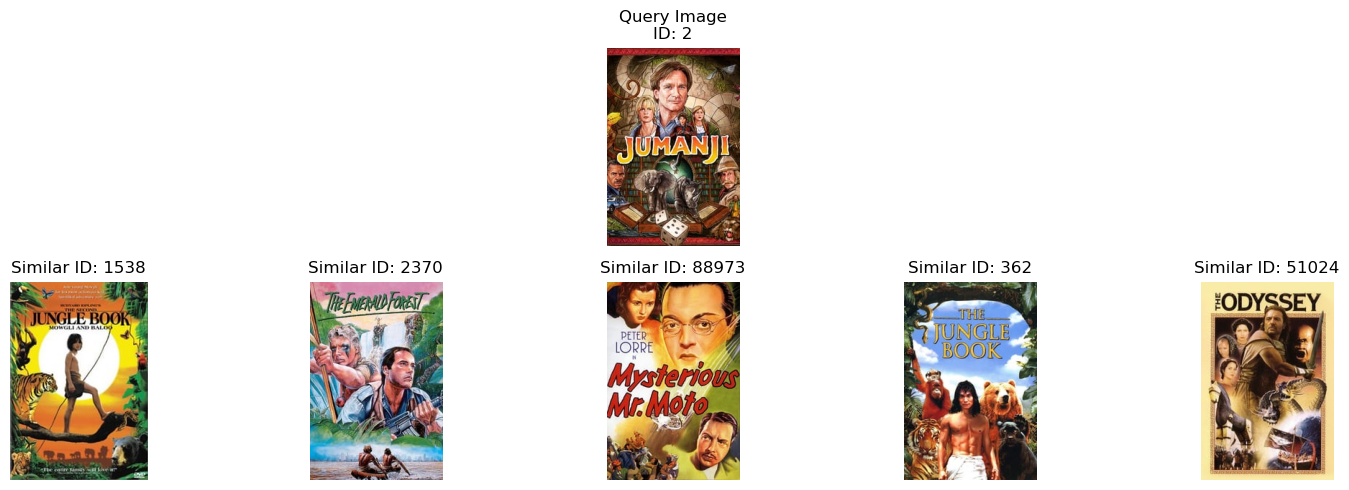

In [14]:
npz_path = "data/processed/posters_vit_H_14_features_v2.npz"
image_folder = "data/ml-20m-psm/posters"

ids, features = load_data(npz_path)
ids = ids.astype(str)  # Ensure IDs are strings to match file names

# Apply PCA
#reduced_features, pca = apply_pca(features, n_components=300)

# Find the top 5 similar images to a given image ID
query_image_id = "2"  # Replace with the ID of the query image
top_k = 5
similar_image_ids = find_similar_images(query_image_id, top_k, ids, features)

# Plot the query image and its most similar images
plot_similar_images(query_image_id, similar_image_ids, image_folder)
